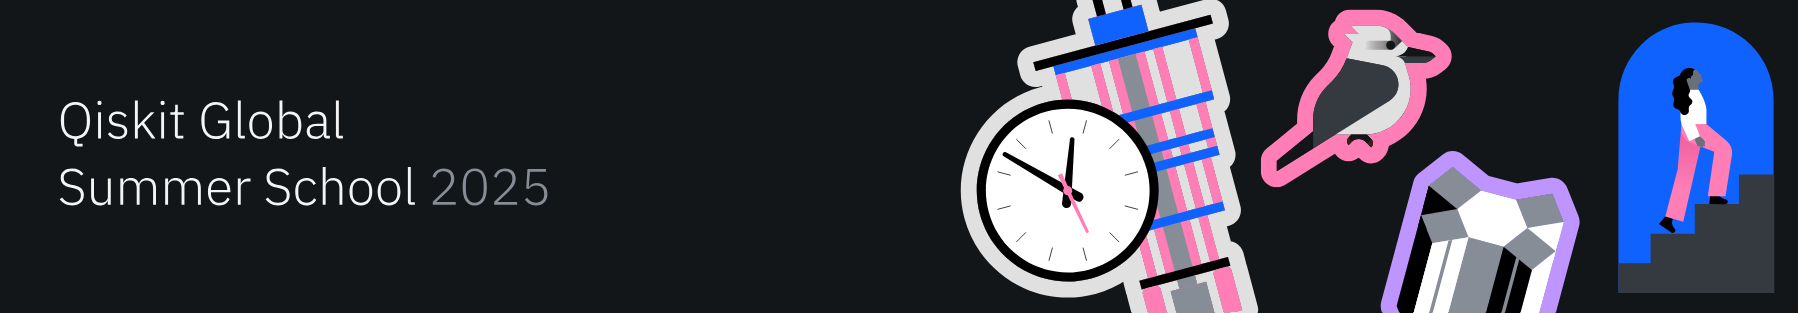

# Lab 0: Hello Quantum World!

# 목차

* [Qiskit Global Summer School 2025에 오신 것을 환영합니다!](#welcome)
    - [Lab 0 개요](#overview)
    - [Qiskit 설치하기](#install)
    - [오류 발생 시](#troubleshooting)
    - [IBM Cloud 계정 세팅](#setting-ibm-cloud)
    - [불러오기](#imports)
    - [기능 점검](#sanity-check)
* [Qiskit pattern에 따라 3-큐빗 GHZ 상태를 만들어봅시다](#ghz) 
    - [Step 1. 정의](#map)
    - [Step 2. 최적화](#optimize)
    - [Step 3. 실행](#execute)
    - [Step 4. 후처리](#post-process)
* [축하합니다!](#congratulations)
    - [보너스 챌린지: 실제 하드웨어에서 GHZ 회로를 실행해봅시다](#bonus)


# Qiskit Global Summer School 2025에 오신 것을 환영합니다! <a id="welcome"></a>

안녕하세요, 올해도 새로운 Qiskit Global Summer School(QGSS)으로 여러분을 만나볼 수 있어 정말 행복하네요. 이 2주간의 여름 학교에서는 처음 시작하는 학생과 연구자, 이미 Qiskit에 익숙한 전문가까지 다양한 커뮤니티의 사람들이 양자 컴퓨팅과 양자 프로그래밍 지식을 배울 수 있도록 이론 강의와 실습 문제를 제공하고 있습니다.

특히, 이 여름 학교의 실습 부분에서는 여러분이 몇 가지 흥미로운 주제들을 만나볼 수 있도록 만들어진 주피터 노트북("lab")들을 공부하고 풀어보게 됩니다.

각각의 랩은 앞의 이론 강의에서 배운 내용을 보완하고, 관련 문서, 튜토리얼, 참고 자료 등을 확인할 수 있는 링크도 기재되어 있습니다. 여기 양자 컴퓨팅에 대한 수많은 교육자료들을 찾을 수 있는 [IBM Quantum Learning](https://quantum.cloud.ibm.com/learning) 플랫폼처럼요.

## Lab 0 개요 <a id="overview"></a>

이번 입문용 랩의 목표는 여러분께 랩 노트북을 사용하는 법과 답안을 채점하는 법을 보여주고, 여러분이 앞으로 풀어야 할 양자 코드를 실행할 수 있도록 컴퓨터를 잘 세팅하셨는지 확인하는 것입니다.

QGSS의 랩을 완료하기 위해서는, 모든 노트북에 수정해서는 안 되는 미리 작성된 코드와 직접 채워야 하는 챌린지 코드 블록이 있다는 점을 확인해주세요. 특히, `### 아래에 코드를 작성해주세요 ###`라는 주석을 찾으신다면 그 아래에 필요한 코드는 직접 작성해야 합니다. 만약 노트북 커널을 재시작하시는 경우에는 모든 셀을 처음부터 순서대로 실행하여 노트북이 올바르게 실행되고 채점이 되도록 해야 합니다. 이렇게 함으로써 모든 코드가 수정된 내용에 따라 원활하게 실행되고 있다는 것을 확인할 수 있습니다. 물론, 패키지를 설치하는 셀이나 계정을 저장하는 셀과 같은 몇 가지 예외는 있을 수 있습니다 - 이런 셀들은 다시 실행하지 않아도 괜찮습니다.

이번 랩에서는 Qiskit pattern에 따라 GHZ 상태를 만들고, 양자 회로를 최적화하는 법을 중점적으로 배웁니다. 마지막 부분은 여러분의 코드를 실제 양자 컴퓨터에서 실행할 수 있는 보너스 문제입니다.

## Qiskit 설치하기 <a id="install"></a>
양자 컴퓨터는 암호를 푸는 쇼어 알고리즘, 더 빠른 검색을 가능하게 하는 그로버 알고리즘, 배터리 설계 등에 적용되는 양자 위상 측정 등, 기존 계산 방식의 혁신을 가져다 줄 기술로 자리매김하고 있습니다. 이 모든 것들의 첫 단계는 이러한 알고리즘들을 구현하고 실행하기 위한 소프트웨어 도구를 선택하는 것입니다. 이 여름 학교 챌린지에서는 양자 회로를 설계하고 구현하여 시뮬레이터와 실제 하드웨어에서 실행하기 위해 Qiskit이라는 도구를 사용하겠습니다. 다음 코드를 따라 Qiskit 2.0 버전을 설치해봅시다.

첫 번째로, 현재 사용 중인 파이썬의 버전이 최신 Qiskit 버전과 호환 가능한 3.10 버전 이상이 맞는지 확인해주세요:

In [ ]:
from platform import python_version

print(python_version())

만약 3.10 이전 버전을 사용하고 계시다면 각자의 환경에 맞는 방법으로 파이썬 버전을 업데이트 해주세요. 아래에 여러분이 시도해볼 수 있는 몇 가지 방법을 링크해두었습니다:

- MacOS: [Homebrew](https://brew.sh/)
- Linux: `sudo apt-get update `

각 OS별 파이썬 업그레이드에 관한 자세한 가이드는 여기에서 찾아보실 수 있습니다: [How to update Python](https://4geeks.com/how-to/how-to-update-python-version)

<div class="alert alert-block alert-warning">
    
⚠️ **공지:** 이번 QGSS의 Lab 3는 윈도우 환경에서는 실행이 되지 않습니다. 따라서 여러분이 윈도우를 사용하고 계신다면 [온라인 랩 환경](https://docs.quantum.ibm.com/guides/online-lab-environments)을 이용하시길 추천드립니다. + qBraid 에서 안내하는 QGSS 2025 가이드도 참고해주세요: [qBraid QGSS 2025](https://docs.qbraid.com/lab/user-guide/qgss-2025)

</div>

QGSS 2025 위키에서 이와 관련한 추가적인 안내를 확인하실 수 있습니다: https://github.com/qiskit-community/qgss-2025/wiki/Jupyter-Notebook-Environment-(Local-and-Online)

환경 설정이 마무리되었으면 이제 이번 여름 학교에서 사용할 그레이더와 Qiskit, 그 외 필수적인 라이브러리를 설치해봅시다.

In [ ]:
%pip install "qc-grader[qiskit,jupyter] @ git+https://github.com/qiskit-community/Quantum-Challenge-Grader.git"

In [ ]:
import qiskit
import qc_grader

print(f"Qiskit version: {qiskit.__version__}")
print(f"Grader version: {qc_grader.__version__}")

Qiskit 버전 `>=2.0.0` 그레이더 버전 `>=0.22.9` 이상이 나오면 되겠습니다. 만약 버전이 다르게 표시된다면 커널을 재시작해보시고, 그래도 안 된다면 그레이더를 다시 설치해야 할 수 있습니다.

## 오류 발생 시 <a id="troubleshooting"></a>

만약 앞의 셀에서 버전이 표시되지 않거나 계속해서 오류가 발생하는 경우 아래의 방법을 참고해 가상환경을 설정하거나 앞에서 안내한 온라인 랩 환경을 이용해주세요. 에러 없이 잘 실행이 됐다면 이 챕터는 넘어가셔도 됩니다.

다음은 Qiskit을 사용하기 위한 가상환경을 설정하는 두 가지 방법입니다.
1. [venv](https://docs.python.org/3/library/venv.html)를 사용하여 [Qiskit installation guide](https://docs.quantum.ibm.com/guides/install-qiskit)의 안내를 따르기 
2. [conda](https://docs.conda.io/projects/conda/en/latest/user-guide/install/index.html)를 사용하여 [Coding with Qiskit](https://www.youtube.com/watch?v=93-zLTppFZw&list=PLOFEBzvs-VvrgHZt3exM_NNiNKtZlHvZi&index=4) 영상의 안내를 따르기

## IBM Cloud 계정 세팅 <a id="setting-ibm-cloud"></a>

여름 학교 랩에서 그레이더로 채점을 하고 양자 회로를 실제 하드웨어에서 실행하기 위해서는 IBM Cloud 계정을 설정해야 합니다.


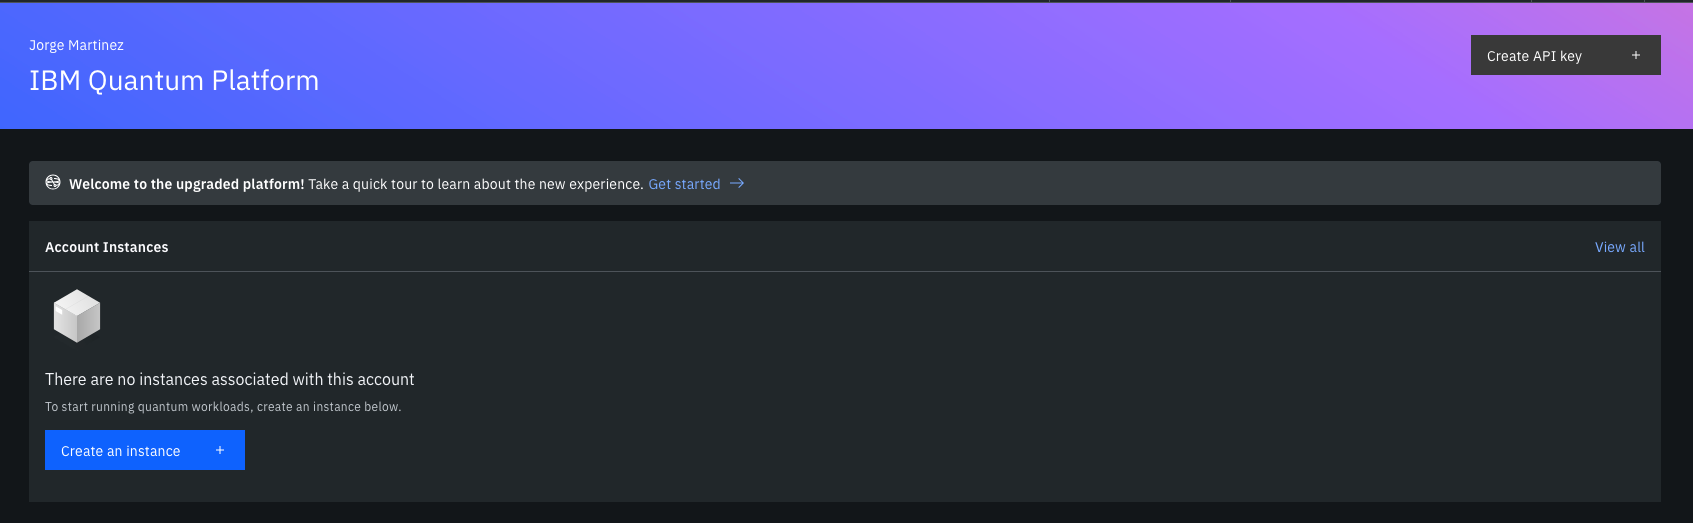




다음의 순서를 따라 계정을 설정해주세요:

1. [새로운 IBM Quantum&reg; 플랫폼](https://quantum.cloud.ibm.com/)에 로그인하세요.
2. 위 그림과 같은 화면에서 오른쪽 위의 **Create API key** 버튼을 누르고 안내를 따라 키를 생성한 뒤 안전하게 저장해두세요.
3. 다음 셀로 가서 `이문장을지우고API키를붙여넣으세요` 부분에 API 키를 붙여넣으세요.
4. 다시 플랫폼의 위 그림과 같은 화면에서 **Create an instance** 버튼을 누르고 안내를 따라 open plan으로 인스턴스를 생성하세요.
5. 인스턴스가 생성되었다면, 인스턴스의 CRN 코드를 복사하세요. 인스턴스가 보이지 않는 경우에는 화면을 새로고침 해주세요.
6. 다음 셀로 가서 `이문장을지우고CRN을붙여넣으세요` 부분에 CRN 코드를 붙여넣으세요.

IBM Cloud&reg; 계정 설정에 관한 자세한 사항은 [이 가이드](https://quantum.cloud.ibm.com/docs/guides/cloud-setup)를 참고하세요.

<div class="alert alert-block alert-warning">
    
⚠️ **공지:** 여러분의 API 키는 비밀번호와 같이 안전하게 다뤄야 합니다. 안전한 환경 또는 신뢰할 수 없는 환경에서 API 키를 사용하는 자세한 방법은 [클라우드 설정 가이드](https://quantum.cloud.ibm.com/docs/guides/cloud-setup#cloud-save)를 참고해주세요.

</div>

In [ ]:
# API 키를 저장하여 답안을 제출하고 양자컴퓨터에 접속하는 데에 사용합니다

your_api_key = "이문장을지우고API키를붙여넣으세요"
your_crn = "이문장을지우고CRN을붙여넣으세요"

from qiskit_ibm_runtime import QiskitRuntimeService

QiskitRuntimeService.save_account(
    channel="ibm_quantum_platform",
    token=your_api_key,
    instance=your_crn,
    name="qgss-2025",
    overwrite=True
)

In [ ]:
# 계정이 잘 저장되었는지 확인합니다
service = QiskitRuntimeService(name="qgss-2025")
service.saved_accounts()

## 불러오기 <a id="imports"></a>


In [ ]:
import matplotlib.pyplot as plt

from qiskit import QuantumCircuit, generate_preset_pass_manager
from qiskit.visualization import plot_histogram
from qiskit.quantum_info import SparsePauliOp

from qiskit_ibm_runtime import QiskitRuntimeService, SamplerV2 as Sampler, EstimatorV2 as Estimator

from qiskit_aer import AerSimulator

from qc_grader.challenges.qgss_2025 import grade_lab0_ex1, grade_lab0_ex2

## 기능 점검 <a id="sanity-check"></a>

모든 설정이 완료되었으면 이제 간단한 양자 회로를 만들어 모든 기능이 정상적으로 동작하는지 확인해봅시다.

In [ ]:
# 2-큐빗 회로를 만듭니다
qc = QuantumCircuit(2)
# 0번 큐빗에 H 게이트를 가합니다
qc.h(0)
# 0번 큐빗에서 1번 큐빗으로 CNOT 게이트를 가합니다
qc.cx(0, 1)
# MatPlotLib ("mpl")으로 회로를 그립니다
qc.draw("mpl")

보고 계신 양자 회로는 Bell 상태를 만드는 양자 회로에 해당합니다:

$$|Bell\rangle=\frac{|00\rangle+|11\rangle}{\sqrt{2}}$$

# Qiskit pattern에 따라 3-큐빗 GHZ 상태를 만들어봅시다 <a id="ghz"></a>

자 이제 [Coding with Qiskit](https://www.youtube.com/watch?v=93-zLTppFZw&list=PLOFEBzvs-VvrgHZt3exM_NNiNKtZlHvZi&index=4) 영상을 따라 [Qiskit pattern](https://quantum.cloud.ibm.com/docs/en/guides/intro-to-patterns)을 이용해 3-큐빗 GHZ 상태를 만드는 과정을 알아봅시다.

Qiskit 패턴은 여러 응용 분야의 문제를 쪼개고 단계별로 필요한 기능을 설계하는 보편적인 프레임워크입니다. 이를 통해 IBM Quantum의 연구원을 포함한 다양한 전문가들이 만든 기능을 보다 쉽게 이해하고 원활하게 사용할 수 있으며, 미래의 CPU/GPU/QPU를 결합한 컴퓨팅 작업도 설계할 수 있습니다.

Qiskit 패턴의 4단계는 다음과 같습니다:

1. 문제를 양자 회로와 관측가능량으로 **정의**합니다.
2. 사용하는 하드웨어에 맞게 **최적화**합니다.
3. 하드웨어에서 **실행**합니다.
4. 결과를 **후처리**합니다.


## Step 1. 정의 <a id="map"></a>

Greenberger–Horne–Zeilinger(GHZ) 상태는 위에서 다뤘던 Bell 상태와 같이 최대로 얽힌 상태를 3개 또는 그 이상의 큐빗으로 확장한 것입니다. 예를 들어, 3-큐빗 GHZ 상태는 다음과 같이 정의할 수 있습니다:

$$
|GHZ\rangle = \frac{|000\rangle+|111\rangle}{\sqrt{2}}.
$$

GHZ 상태의 흥미로운 성질 중 하나는 이것을 여러 가지 방법으로 양자 회로에서 구현할 수 있다는 것입니다. 연습문제 1에서는 그 중 가장 일반적인 방법으로 GHZ 상태를 만들어보겠습니다.

<a id="Exercise_1"></a>
<div class="alert alert-block alert-success">
    
<b>연습문제 1: GHZ 상태 만들기</b> 

자 드디어 올해 여름 학교의 첫 번째 연습문제입니다~ 빠밤!

문제입니다, 다음의 단계를 따라 GHZ 상태를 만들어주세요:

1. 0번 큐빗에 Hadamard 게이트를 가해 중첩 상태를 만들어주세요. 
2. 0번 큐빗에서 1번 큐빗으로 CNOT 게이트를 가하세요.
3. 1번 큐빗에서 2번 큐빗으로 CNOT 게이트를 가하세요.

</div>

In [ ]:
# 3-큐빗 회로를 만듭니다
qc = QuantumCircuit(3)

### 아래에 코드를 작성해주세요 ###
# 0번 큐빗에 H 게이트를 가하세요

# 0번 큐빗에서 1번 큐빗으로 CNOT 게이트를 가하세요

# 1번 큐빗에서 2번 큐빗으로 CNOT 게이트를 가하세요

### 코드 작성이 완료되었습니다 ###

# MatPlotLib ("mpl")으로 회로를 그립니다
qc.draw("mpl")

In [ ]:
# 아래의 함수를 실행해 답안을 제출해주세요
grade_lab0_ex1(qc)

## Step 2. 최적화 <a id="optimize"></a>

훌륭하게 해내셨군요!

다음 단계는 최적화입니다. 지금은 회로가 매우 짧아서 회로를 더 단순화하거나 필요한 게이트의 수를 줄이기는 어렵습니다. 하지만 다른 여러 상황에서는 회로를 최적화하는 것이 중요하게 작용하는 경우가 많습니다.

실제 양자 회로를 구성할 때에는 여러 가지 제약이 발생할 수 있습니다. 예를 들어, 사용하는 하드웨어에 따라 큐빗 간의 연결이 제약될 수 있죠. 이 경우, 일부 큐빗들은 사용자가 원하는 대로 연결되어 있지 않으며, 따라서 원하는 양자 상태를 구현하기 위해 좀 더 현명한 방법을 생각해봐야 할 수 있습니다. 다행히도, 여기서 Qiskit 트랜스파일러가 여러분을 도와주게 됩니다! Qiskit에서 제공하는 프리셋 패스매니저에 하드웨어의 제약 조건을 넣어주고 원하는 회로를 트랜스파일하도록 하면 이러한 최적화를 알아서 처리해줍니다.

자 이제 GHZ 상태로 돌아와서, 큐빗 0과 1, 0과 2는 연결되어 있지만, 큐빗 1과 2는 연결되어 있지 않은 상황을 생각해봅시다. 이러한 제약 조건은 `generate_preset_pass_manager` 함수에 전달하여 최적화에 적용할 수 있습니다.

<a id="Exercise_2"></a>
<div class="alert alert-block alert-success">
    
<b>연습문제 2: GHZ 상태 트랜스파일 하기</b> 

두 번째 연습문제에서는 앞에서 만든 GHZ 상태를 주어진 연결 조건에 따라 트랜스파일을 해보도록 하겠습니다.

- 큐빗 0 <---> 큐빗 1
- 큐빗 0 <---> 큐빗 2
- ~~큐빗 1 <---> 큐빗 2~~

</div>

In [ ]:
### 아래에 코드를 작성해주세요 ###
# 큐빗 0과 1, 0과 2가 연결되어 있음을 나타내는 coupling map을 다음과 같이 짝지어서 리스트로 작성해주세요: [[0,1],...]
coupling_map =

# `generate_preset_pass_manager` 함수와 coupling map을 이용해 패스매니저를 만들고 양자 회로 `qc`를 트랜스파일 해주세요
pm =
qc_transpiled =
### 코드 작성이 완료되었습니다 ###

qc_transpiled.draw("mpl")

In [ ]:
# 아래의 함수를 실행해 답안을 제출해주세요
grade_lab0_ex2(qc_transpiled)

## Step 3. 실행 <a id="execute"></a>

다음 단계로 넘어가볼까요? 이제 만들어진 양자 회로를 Qiskit Runtime을 통해 실행해볼 차례입니다!

실행 단계에서는 두 가지의 [Qiskit primitive](https://quantum.cloud.ibm.com/docs/guides/primitives)를 사용해 양자 회로를 실행하게 됩니다:
1. **Sampler**는 양자 회로를 실행하여 얻게 되는 레지스터의 결괏값을 샘플링합니다. Sampler의 출력값은 각 shot에서 얻은 레지스터 결괏값의 카운트입니다.
2. **Estimator**는 양자 회로가 만든 상태에서 특정 관측가능량을 측정하여 그 기댓값을 계산합니다. Estimator의 출력값은 설정된 관측가능량의 기댓값과 표준 편차로 이루어집니다.

먼저 Sampler를 사용하여 회로를 실행하고, 결과를 `results_sampler` 변수에 저장해봅시다.

In [ ]:
# 백엔드를 설정합니다
backend = AerSimulator()

# Sampler를 설정합니다
sampler = Sampler(mode=backend)

# Sampler로 회로를 실행합니다 (Sampler를 실행할 때에는 측정 부분을 꼭 포함해주세요)
pm = generate_preset_pass_manager(backend=backend)
job = sampler.run([pm.run(qc.measure_all(inplace=False))])

# 결과를 가져옵니다
results_sampler = job.result()

이번에는 Estimator를 사용하여 회로를 실행하고, 결과를 `results_estimator` 변수에 저장해봅시다.

In [ ]:
# Estimator를 설정합니다
estimator = Estimator(mode=backend)

# 관측가능량을 정의합니다
ZZZ = SparsePauliOp("ZZZ")
ZZX = SparsePauliOp("ZZX")
ZII = SparsePauliOp("ZII")
XXI = SparsePauliOp("XXI")
ZZI = SparsePauliOp("ZZI")
III = SparsePauliOp("III")
observables = [ZZZ, ZZX, ZII, XXI, ZZI, III]

# Estimator로 회로를 실행합니다
pm = generate_preset_pass_manager(backend=backend)
pub = (pm.run(qc), observables)
job = estimator.run(pubs=[pub])

# 결과를 가져옵니다
results_estimator = job.result()

다음은 Qiskit 패턴의 마지막 단계입니다. 여기서 얻은 결과를 출력해봅시다.

## Step 4. 후처리 <a id="post-process"></a>

Qiskit 패턴의 마지막 단계는 회로를 실행하여 얻은 정보를 후처리하는 것입니다.

먼저 Sampler에서 얻은 결과를 출력해봅시다. 히스토그램 그래프를 이용하면 Sampler에서 얻은 결괏값의 카운트를 시각화하여, 두 개의 양자 상태가 50% 확률로 관측되는 것을 쉽게 확인할 수 있습니다.

In [ ]:
counts_list = results_sampler[0].data.meas.get_counts()
print(f"  Outcomes : {counts_list}")
display(plot_histogram(counts_list, title="GHZ state"))

Estimator의 결과도 출력해봅시다.

In [ ]:
exp_values = results_estimator[0].data.evs
observables_list = ["ZZZ", "ZZX", "ZII", "XXI", "ZZI", "III"]
print(f"Expectation values: {list(zip(observables_list, exp_values))}")

# 그래프를 그립니다
container = plt.bar(observables_list, exp_values, width=0.8)
# x축과 y축 이름을 설정합니다
plt.xlabel("Observables")
plt.ylabel("Values")
plt.show()

여기서는 관측가능량 $ZZI$와 $III$가 기댓값 1을 갖는 것을 확인하실 수 있습니다. $ZZI$를 관측할 때에는 (-) 부호가 항상 두 개씩 나와 서로 상쇄되고, $III$는 항등원이어서 그렇죠. 그 외의 관측가능량은 기댓값이 0인 것을 볼 수 있는데, 이는 $Z$ 연산자의 개수가 홀수개여서 (-) 부호가 상쇄되지 않거나, $X$ 연산자가 큐빗을 뒤집어 두 상태가 수직이 되도록 만들기 때문입니다.

# 축하합니다! <a id="congratulations"></a>

여러분은 성공적으로 lab 0를 마치고 Qiskit Global Summer School 2025에 참여할 준비가 되었습니다!

이번 랩에서 여러분은 Qiskit v2.x를 실행하기 위한 환경을 설정하였으며, 여름 학교의 진도를 저장하고 양자 컴퓨터에서 양자 회로를 실행하기 위한 IBM Cloud 계정을 설정하였습니다. 또한, GHZ 회로를 만들고 최적화하는 예시를 통해 Qiskit 패턴에 대해 공부하였습니다. GHZ 회로를 시뮬레이터를 이용해 실행하였고, Sampler의 관측 결과가 이론값과 같이 $|000\rangle$과 $|111\rangle$ 각 50% 확률로 관측되는 것을 확인하였습니다.

아래의 셀을 실행하면 이번 여름 학교 랩의 전체 진도 상황을 확인할 수 있습니다:

In [ ]:
from qc_grader.grader.grade import check_lab_completion_status
check_lab_completion_status("qgss_2025")

보너스 문제로, 같은 실험을 실제 하드웨어에서 실행해보고 노이즈가 어떻게 결과에 영향을 주는지, 이론값과 어느 정도 일치하는지 한 번 확인해봅시다.

준비되셨나요? 시작해볼까요?

## 보너스 챌린지: 실제 하드웨어에서 GHZ 회로를 실행해봅시다 <a id="bonus"></a>

Qiskit으로 양자 컴퓨터에서 양자 회로를 실행하려면 먼저 백엔드를 설정해야 합니다. IBM Quantum의 양자 컴퓨터 중 원하는 것을 직접 선택할 수도 있고요, 어떤 하드웨어를 사용하는지가 큰 상관이 없을 때에는 현재 가장 대기열이 적은 것을 고르는 것이 편할 수도 있습니다. 바로 이럴 때에 `least_busy` 매소드를 사용할 수 있습니다.

In [ ]:
# 서비스를 불러와 IBM QPU에 접속합니다
service = QiskitRuntimeService(name="qgss-2025")

# 대기열이 가장 적은 백엔드를 불러옵니다
backend = service.least_busy(operational=True, simulator=False)
print(f"We are using the {backend.name} quantum computer")

위의 셀은 `QiskitRuntimeService`를 통해 양자 컴퓨터를 얼마나 쉽게 불러올 수 있는지 보여줍니다. 앞의 과정을 통해 백엔드를 골랐다면, 이제 앞에서 시뮬레이터로 실행했던 것과 같은 코드를 그대로 가져와 실제 하드웨어에서 양자 회로를 실행할 수 있습니다. 후처리 과정의 시각화 코드도 포함해서 말이죠.

In [ ]:
### 아래에 코드를 작성해주세요 ###
# Step 1. 정의
# 위에서 `qc`라는 변수에 GHZ 회로를 할당하였던 것을 기억해보세요

# Step 2. 최적화
pm = 
qc_transpiled = 

<div class="alert alert-block alert-warning">
<b>주의: 대기 시간과 10분 사용 시간 제한</b>

이 회로는 실제 하드웨어에서 약 10초의 실행 시간을 갖습니다. 하지만 회로를 실행하기 위해서는 대기하는 시간이 필요하며, 이로 인해 노트북 셀이 실행되는 시간은 대기 시간을 포함해 10초보다 훨씬 길어질 수 있습니다.

별도의 약정이 없는 open plan의 경우 실제 하드웨어를 최대 10분까지 사용할 수 있습니다. 이후의 랩에서 실제 하드웨어를 사용하는 실험이 더 있을 예정이므로, 너무 많은 회로를 실행하여 사용 시간이 부족해지지 않도록 주의해주세요.

</div>

In [ ]:
# Step 3. 실행
sampler = 
job = 

In [ ]:
# Step 4. 후처리
results = 
counts_list = 
### 코드 작성이 완료되었습니다 ###

print(f"Outcomes : {counts_list}")
plot_histogram(counts_list,title='GHZ state')

훌륭합니다! 

여러분은 양자 회로를 실제 양자 컴퓨터에서 실행하였으며 좋은 결과도 얻어내셨습니다. 가장 많이 관측된 상태는 $|000\rangle$과 $|111\rangle$ 상태이며, 50%에 약간 못 미치는 확률을 얻으셨을 것입니다. 그러나 이번에는 실제 하드웨어의 노이즈로 인해, 관측될 확률이 0이어야 할 다른 상태들도 약간씩 관측된 것도 보이실 것입니다. 이것은 자연스러운 현상이며, 이렇게 발생하는 노이즈를 없애거나 완화하는 방법을 다음 랩에서 보게 될 것입니다.

# Additional information

**Created by:** Jorge Martínez de Lejarza

**Advised by:** Marcel Pfaffhauser, Junye Huang

**Translated by:** Boseong Kim

**Version:** 1.0.0